# Practical Data Science: 2nd Assignmnet : SemEval 2025 Task 9: The Food Hazard Detection Challenge

---

> Evangelia P. Panourgia, Master Student in Data Science, AUEB <br />
> Department of Informatics, Athens University of Economics and Business <br />
> eva.panourgia@aueb.gr <br/><br/>

# Setting the Scene

For the scope of this assignment, we will utilize the following Python libraries to accomplish various tasks such as data manipulation, machine learning, natural language processing, visualization, and progress tracking.

### Core Libraries
- **`string`**: A built-in library for common string operations.  
  [Documentation String](https://docs.python.org/3/library/string.html)
- **`typing.Counter`**: A collection for counting hashable objects.  
  [Documentation Counter](https://docs.python.org/3/library/collections.html#collections.Counter)
- **`pandas`**: A fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.  
  [Documentation Pandas](https://pandas.pydata.org)
- **`numpy`**: A fundamental package for scientific computing in Python. It provides support for arrays, mathematical functions, linear algebra, and more.  
  [Documentation NumPy](https://numpy.org)
- **`sklearn.pipeline.Pipeline`**: A tool to sequentially apply a list of transforms and a final estimator.  
  [Documentation Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- **`sklearn.linear_model.LogisticRegression`**: Logistic regression classifier.  
  [Documentation Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **`sklearn.ensemble.RandomForestClassifier`**: A random forest classifier.  
  [Documentation Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- **`sklearn.feature_extraction.text.TfidfVectorizer`**: A vectorizer to convert a collection of text documents to a matrix of TF-IDF features.  
  [Documentation TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- **`sklearn.model_selection.train_test_split`**: Utility to split arrays or matrices into random train and test subsets.  
  [Documentation Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- **`sklearn.model_selection.StratifiedKFold`**: Cross-validator for stratified K-folds.  
  [Documentation StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- **`sklearn.metrics`**: Metrics for model evaluation, including `f1_score` and `classification_report`.  
  [Documentation Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
- **`imblearn.over_sampling.SMOTE`**: Synthetic Minority Oversampling Technique for dealing with imbalanced datasets.  
  [Documentation SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- **`nltk.tokenize.word_tokenize`**: A tokenizer for splitting text into words.  
  [Documentation Word Tokenize](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)
- **`nltk.corpus.stopwords`**: A collection of stop words for various languages.  
  [Documentation Stopwords](https://www.nltk.org/nltk_data/)
- **`nltk.stem.WordNetLemmatizer`**: A lemmatizer based on WordNet.  
  [Documentation WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.html#nltk.stem.WordNetLemmatizer)
- **`nltk.stem.PorterStemmer`**: A stemmer based on Porter’s algorithm.  
  [Documentation PorterStemmer](https://www.nltk.org/api/nltk.stem.html#nltk.stem.PorterStemmer)
- **`deep_translator.GoogleTranslator`**: A library for translating text using Google Translate.  
  [Documentation GoogleTranslator](https://deep-translator.readthedocs.io/)
- **`langid`**: A tool for language identification.  
  [Documentation LangID](https://github.com/saffsd/langid.py)
- **`matplotlib.pyplot`**: A comprehensive library for creating static, animated, and interactive visualizations in Python.  
  [Documentation Matplotlib](https://matplotlib.org)
- **`sklearn.utils.shuffle`**: A utility to shuffle arrays or sparse matrices.  
  [Documentation Shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)

### Notes
- Ensure the necessary NLTK data files are downloaded:
  ```python
  import nltk
  nltk.download('punkt')
  nltk.download('stopwords')
  nltk.download('wordnet')


In [49]:
!pip install langid --upgrade transformers --upgrade sentencepiece googletrans langdetect deep-translator nltk seaborn

In [50]:
# Core libraries
import string
from typing import Counter

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning and model building
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, classification_report

# Oversampling techniques for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Natural Language Processing (NLP)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Translation and language detection
from deep_translator import GoogleTranslator
import langid

# Visualization
import matplotlib.pyplot as plt

# Shuffle utility
from sklearn.utils import shuffle

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

import os
import seaborn as sns

[nltk_data] Downloading package punkt to /Users/evangelia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##  Dataset Explanation


To begin our analysis, we must thoroughly understand each column in the dataset. This involves comprehensively reviewing and interpreting the dataset to establish a clear understanding of the problem we aim to address. All insights start with a solid understanding of our data.

### Dataset Information

The dataset for used in this project is hosted on the following link:

- [labeled trial/training data (5,082 samples)](https://github.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/blob/main/data/incidents_train.csv)

### Column Descriptions

The dataset contains the following columns, each playing a specific role in the analysis:

- **`hazard`**: Detailed descriptions of identified hazards. This column contains `261 classes`, offering a granular view of various hazard types.
  
- **`hazard-category`**: A categorized version of the hazard classification, organized into `10 classes`. This simplified classification assists in broader hazard categorization.
  
- **`product`**: Detailed descriptions of products involved in food recall incidents, encompassing `1,256 classes`. This column provides a comprehensive product categorization.
  
- **`product-category`**: A high-level categorization of the product classification, grouped into `22 classes`, to support simplified product analysis.

- **`title`**: Key parts of the title relevant to  food inident.

- **`text`**: Key parts of the text relevant to  food inident.

- **Metadata**:
  - `year`: Year of the incident.
  - `month`: Month of the incident.
  - `day`: Day of the incident.
  - `language`: Language of the document.
  - `country`: Country where the incident occurred.

## Data Load

- Let's organize the workflow by creating a data directory (if it doesn't exist), downloading the dataset into it, and loading it into a DataFrame for streamlined data handling and analysis.

In [51]:
# Create a directory named 'data' if it doesn't exist
os.makedirs('data', exist_ok=True)
# Download the CSV file into the 'data' folder
!wget -O data/incidents_train.csv https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
# Load the dataset from the 'data' folder
df_food_trial = pd.read_csv('data/incidents_train.csv', index_col=0)
# Display a sample of the dataset
df_food_trial.sample()

--2024-11-21 00:41:39--  https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 12866710 (12M) [text/plain]
Saving to: ‘data/incidents_train.csv’

data/incidents_trai 100%[===================>]  12,27M  2,97MB/s    in 6,8s    

2024-11-21 00:41:46 (1,81 MB/s) - ‘data/incidents_train.csv’ saved [12866710/12866710]



,year,month,day,country,title,text,hazard-category,product-category,hazard,product
2358,2017,9,21,ca,Le Secret de Maurice brand Soft Surface Ripene...,Notification - Le Secret de Maurice brand Soft...,biological,"meat, egg and dairy products",escherichia coli,cheese


## Data Exploration in Training Set 

- We will begin by exploring our dataframe:
    - First, we will examine its dimensions to understand the size and structure.
    - Additionally, we will check for any missing values to assess data completeness.

In [52]:
df_food_trial.shape

(5082, 10)

In [53]:
df_food_trial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5082 non-null   int64 
 1   month             5082 non-null   int64 
 2   day               5082 non-null   int64 
 3   country           5082 non-null   object
 4   title             5082 non-null   object
 5   text              5082 non-null   object
 6   hazard-category   5082 non-null   object
 7   product-category  5082 non-null   object
 8   hazard            5082 non-null   object
 9   product           5082 non-null   object
dtypes: int64(3), object(7)
memory usage: 436.7+ KB


- After examining the dataset, we confirmed that there are **no missing values**, as the Non-Null Count for all columns matches the total number of rows (5082), ensuring data completeness.
- To ensure consistency and facilitate processing, we will convert all columns with a data type of "object" to "string."

In [54]:
df_food_trial = df_food_trial.astype({col: 'string' for col in df_food_trial.select_dtypes(include='object').columns}) # Convert all columns with 'object' dtype to 'string'

### Exploring Countries with more detected Food Incidents
- We will continue to explore our data via focusing on the column `country`.
- A bar chart has been created to visualize the frequency of countries represented in the dataset, with professional formatting, clear labels, and annotations to indicate exact values for each bar.
- A dynamic legend has been included to provide detailed explanations for country abbreviations, enhancing interpretability and ensuring clarity for all viewers.

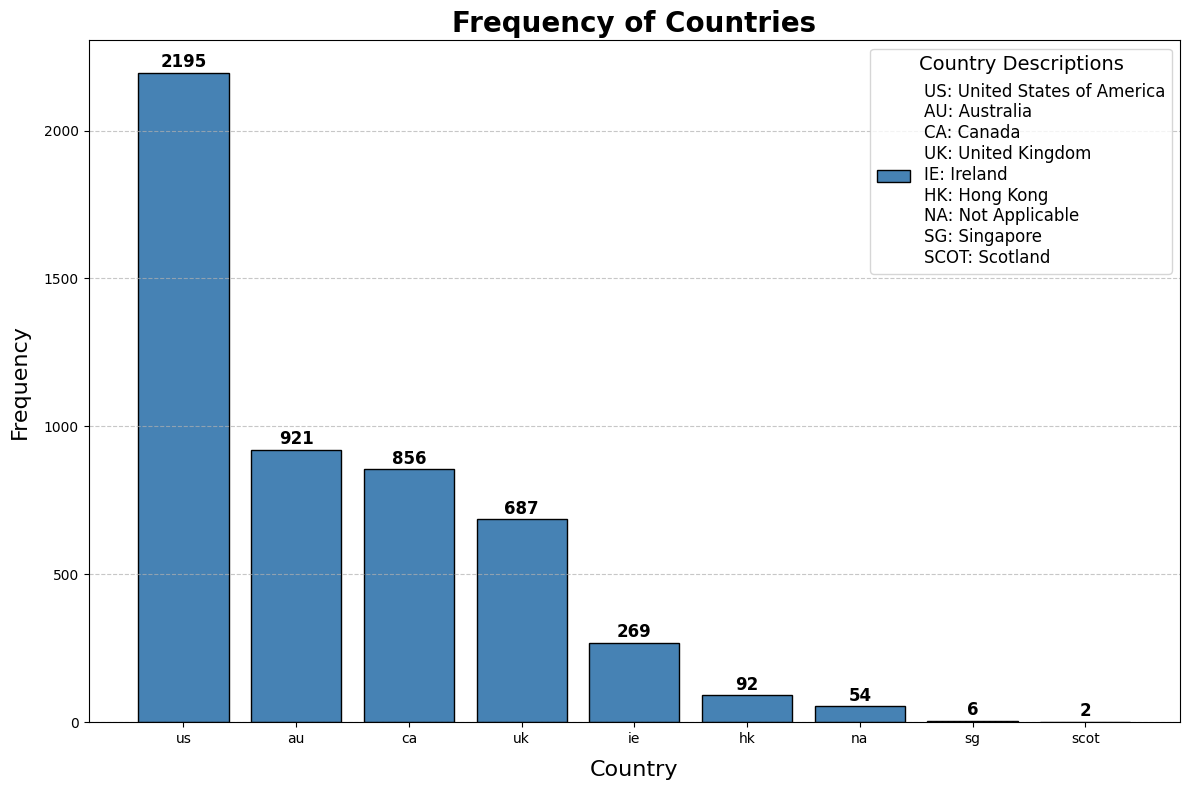

In [55]:
country_frequencies = df_food_trial['country'].value_counts()

# Dictionary for country explanations
country_explanations = {
    "US": "United States of America",
    "AU": "Australia",
    "CA": "Canada",
    "UK": "United Kingdom",
    "IE": "Ireland",
    "HK": "Hong Kong",
    "NA": "Not Applicable",
    "SG": "Singapore",
    "SCOT": "Scotland"
}

# Plot with professional formatting
plt.figure(figsize=(12, 8))
bars = plt.bar(country_frequencies.index, country_frequencies.values, color='steelblue', edgecolor='black')

# Title and labels
plt.title('Frequency of Countries', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)

# Annotate bars with their frequencies
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Generate legend text dynamically
legend_text = "\n".join([f"{key}: {value}" for key, value in country_explanations.items()])
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=True, title='Country Descriptions', title_fontsize=14)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

- The plot clearly illustrates that the `majority of food incidents` occurred in the `US` (`United States of America`), with approximately `22,000` incidents.
- Following the US, `Australia` and `Canada` report a similar number of incidents, with only slight differences between them. `Scotland` recorded `the fewest food incidents`, indicating a significantly lower frequency.
- We will continue data exploration via combining the column `Year` and `Country` with purpose to detect the years per country having the most food incidents. 
    - Note : From previous graph regarding ountry, we wait being US.
- For this purpose we have the following : 
    - A line chart has been plotted to illustrate the trend of food incidents over the years for each country, with distinct line styles and markers assigned to ensure clarity and easy differentiation between countries.
    - The plot includes professional enhancements such as axis labels, a descriptive title, a legend highlighting country-specific trends, and a subtle grid for improved readability.
- Note: In our provided dataset we have data regarding food incidents for **9** countries. 

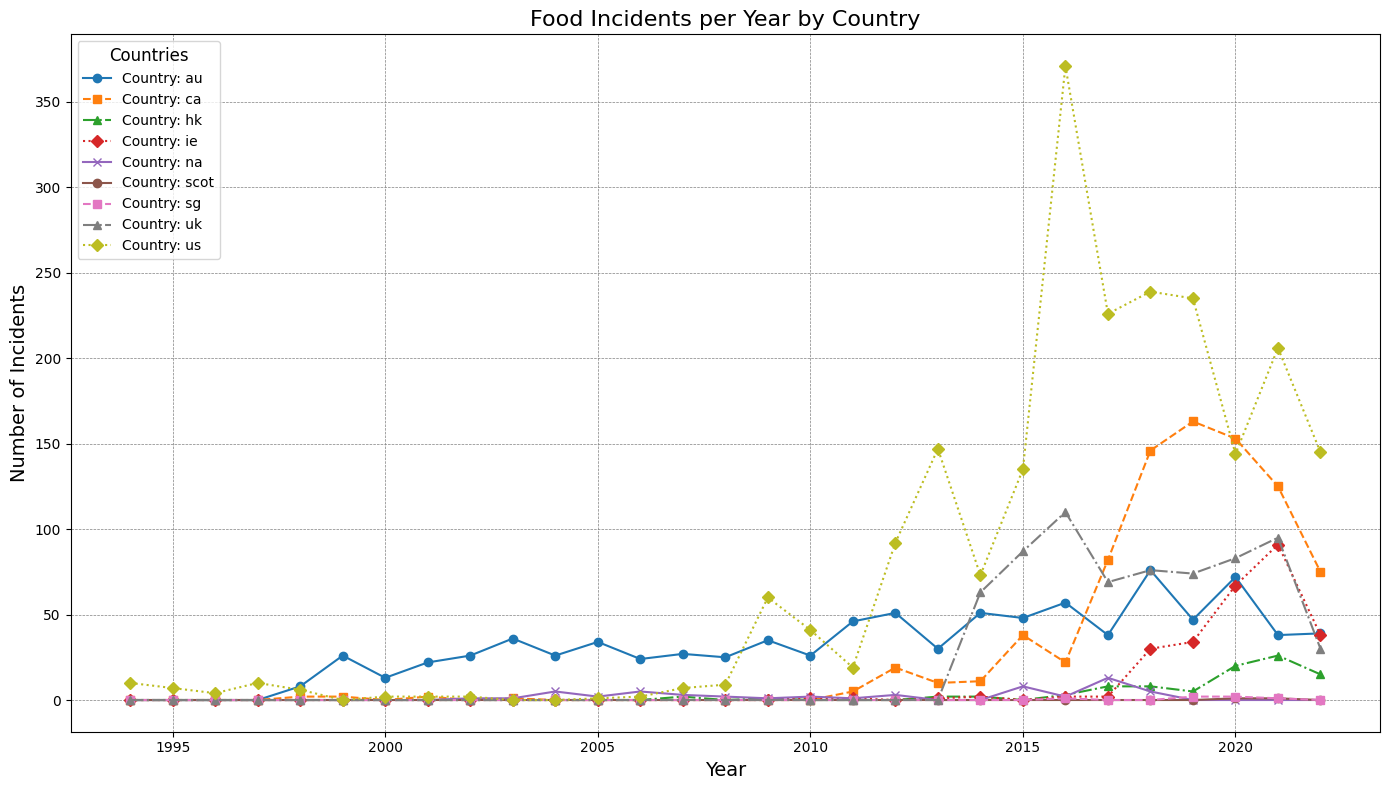

In [56]:
# Group by year and country to count occurrences
incident_count_per_year_country = (
    df_food_trial.groupby(['year', 'country'])
    .size()
    .unstack(fill_value=0)  # Create a pivot table where rows = years, columns = countries
)

# Plotting the data
plt.figure(figsize=(14, 8))

# Define distinct line styles and markers for countries
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'x']

# Plot for each country
for i, country in enumerate(incident_count_per_year_country.columns):
    plt.plot(
        incident_count_per_year_country.index,
        incident_count_per_year_country[country],
        label=f"Country: {country}",
        marker=markers[i % len(markers)],
        linestyle=line_styles[i % len(line_styles)]
    )

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Food Incidents per Year by Country', fontsize=16)
plt.legend(loc='upper left', fontsize=10, title="Countries", title_fontsize=12)

# Add a grid with a lighter color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

- We can observe that in 2016 in US the majority of food incidents presented.

In [57]:
df_food_trial['hazard-category'][(df_food_trial['country']=='us')&(df_food_trial['year']==2016)].value_counts() # delve into data more. 

hazard-category
biological        194
allergens         120
fraud              28
foreign bodies     19
other hazard        6
chemical            4
Name: count, dtype: Int64

- And we can observe that the key majors for this year in US was the biological and allergens hazard. 

#### Hypothesis: countries have set protocols for food recalls, it is of importance to do some analysis based on each country. These patterns could show in the length of the text, length of the title, and observing samples from each country

### Hypothesis: Analyzing Patterns in Food Recall Protocols Across Countries
- Countries establish specific protocols for food recalls. Conducting an analysis based on these protocols is of significant importance. By examining various aspects such as the length of the text, title length, and sample patterns from each country, valuable insights may emerge into the differences and commonalities in how countries handle food recalls.

In [58]:
def get_text_statistics(df, country='us',field='title'):
    
    if country!="all":
        df_filtered = df[df['country'] == country].copy()  # Create a copy to avoid modifying the original DataFrame
        df_filtered.loc[:, 'word_count'] = df_filtered[field].apply(lambda x: len(x.split()))

        plt.figure(figsize=(12, 6))
        sns.boxplot(x='year', y='word_count', data=df_filtered)
        plt.title(f"Word Count Distribution by Year ({country.upper()}), in {field}")
        plt.xticks(rotation=45)
        plt.show()
    else:
        df['word_count'] = df[field].apply(lambda x: len(x.split()))
        countries = df['country'].unique()
        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        axes = axes.flatten()

        for i, country in enumerate(countries):
            country_data = df[df['country'] == country]
            sns.boxplot(x='year', y='word_count', data=country_data, ax=axes[i])
            axes[i].set_title(f"Word Count by Year ({country.upper()}), in {field}")
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

        plt.tight_layout()
        plt.show()

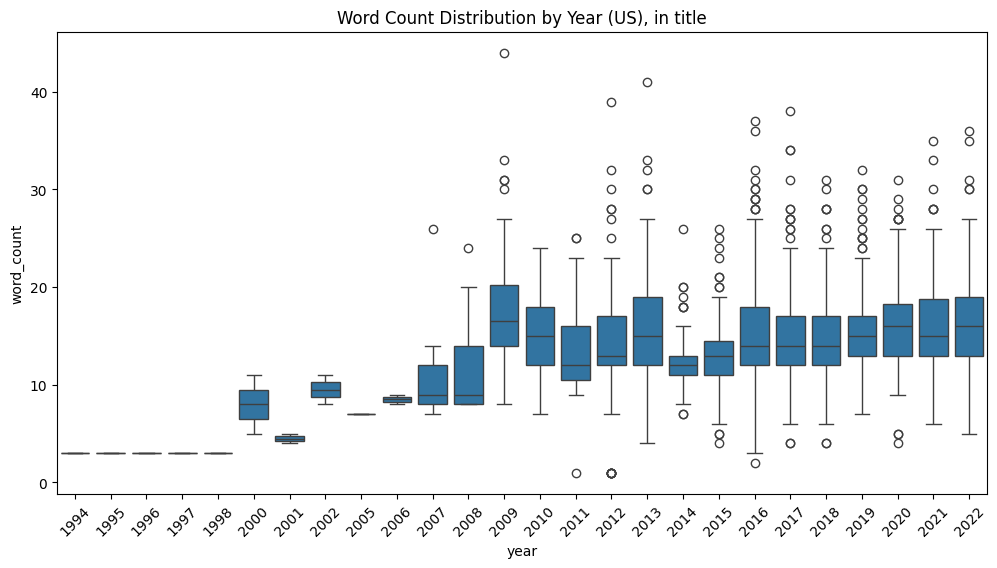

In [59]:
get_text_statistics(df_food_trial, country='us',field='title')

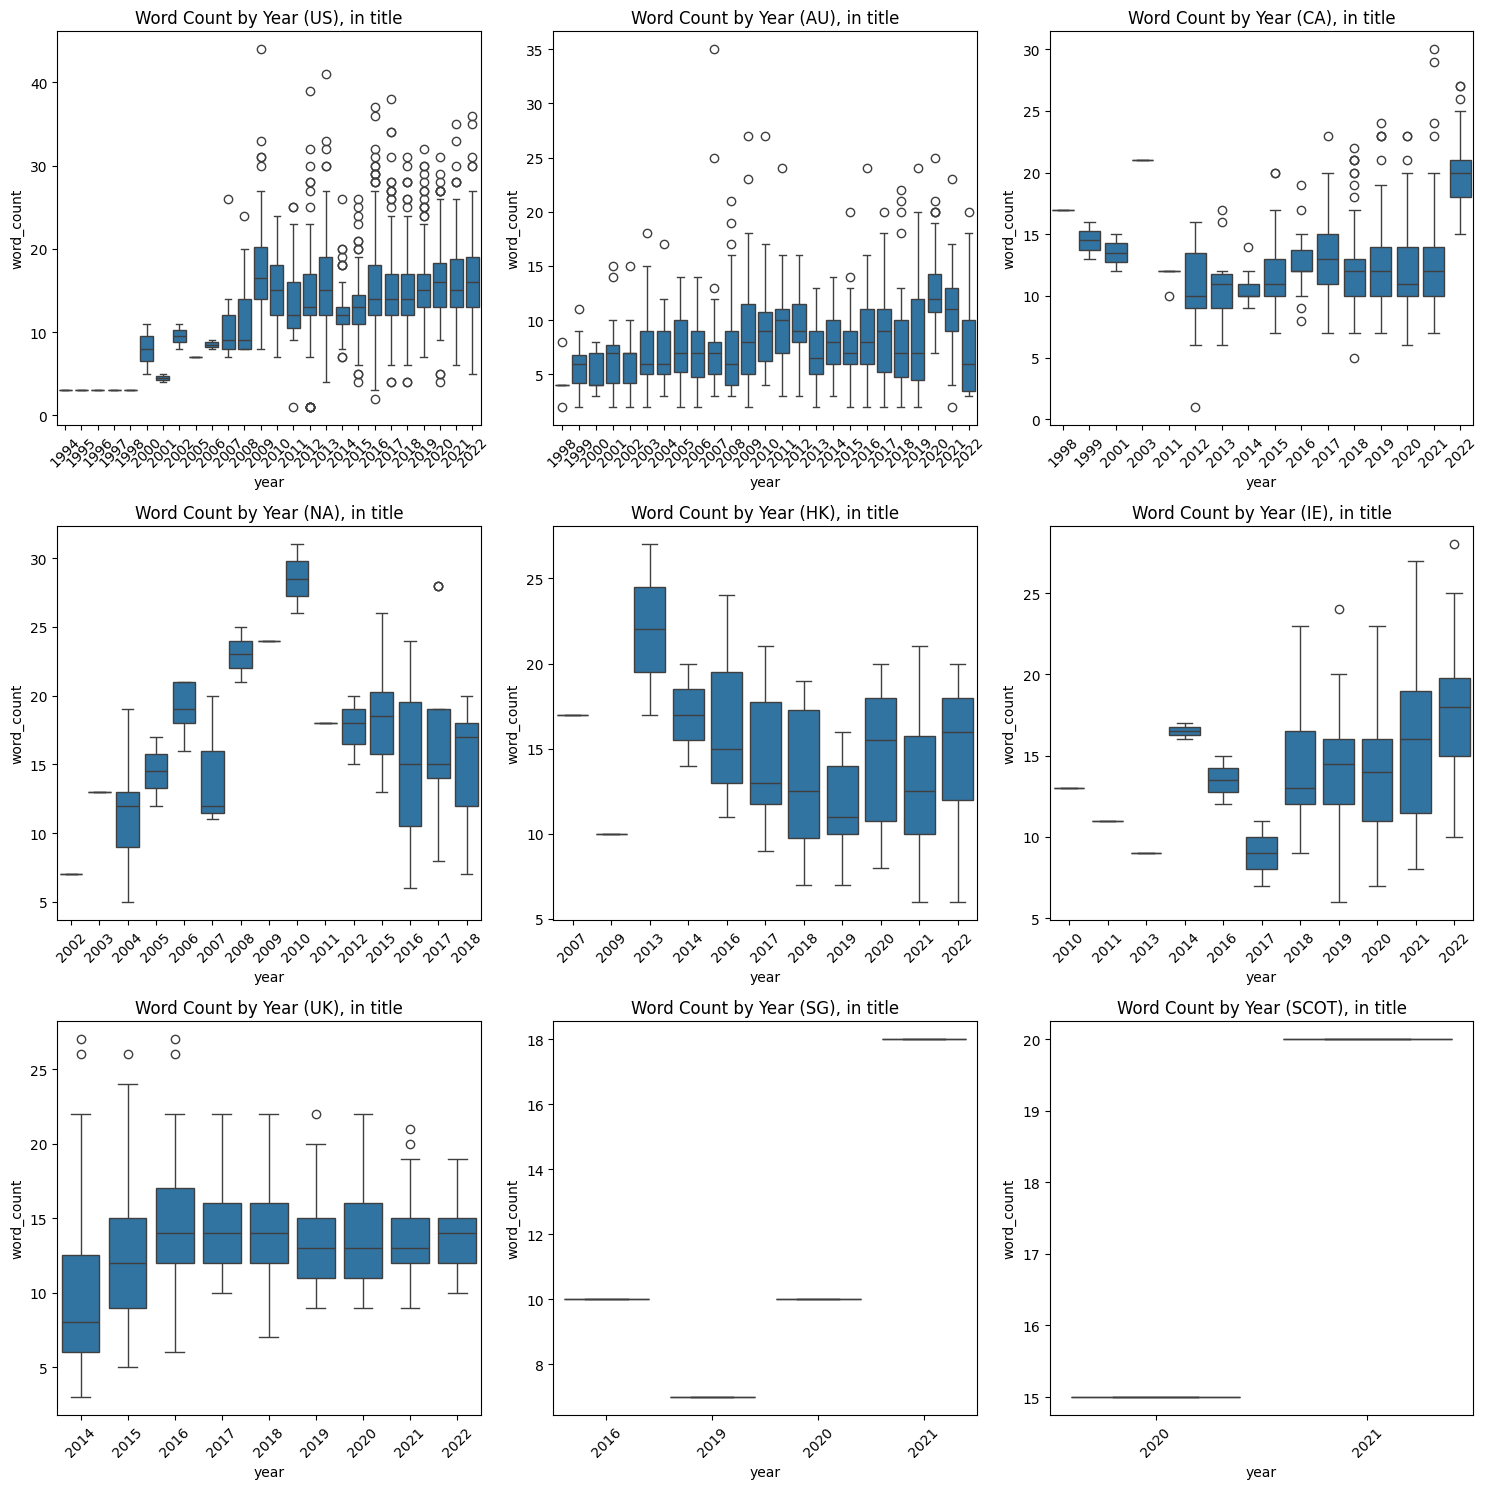

In [60]:
get_text_statistics(df_food_trial, country='all',field='title')

### Checking Language for columns "Title" & "Text"

- The code detects the language of the text in the `text` and `title` columns of the df_food_trial DataFrame and stores the language codes in new columns `language_text` and `language_title`.

In [61]:
# Detect language for each text entry in the 'text' column
df_food_trial['language_text'] = df_food_trial['text'].apply(lambda x: langid.classify(x)[0])
df_food_trial['language_title'] = df_food_trial['title'].apply(lambda x: langid.classify(x)[0])
df_food_trial


,year,month,day,country,title,text,hazard-category,product-category,hazard,product,word_count,language_text,language_title
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,3,en,en
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 Date Opened...,biological,"meat, egg and dairy products",listeria spp,sausage,3,en,en
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,3,en,en
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,3,en,en
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,3,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits,6,en,en
5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022 High - Class I Produced Wi...,fraud,prepared dishes and snacks,inspection issues,pizza,13,en,en
5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages,16,en,en
5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022 High - Class I Misbranding...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products,13,en,en


- We can see that in our dataframe `df_food_trial` two additional columns added that is language_text and language_title having as values 2 letters representing the langiage (e.g. "en" = "english"). 

In [62]:
df_food_trial[df_food_trial['language_text'] != 'en']

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,word_count,language_text,language_title
868,2013,7,13,us,2009 - spanish: torres hillsdale country chees...,FOR IMMEDIATE RELEASE -- PARA IMEDIAT ANUNCIO-...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,21,es,en
4855,2021,3,3,us,El Abuelito EXPANDE SU RETIRO DEL MERCADO PARA...,"Cuando una empresa anuncia una retirada, retir...",biological,"meat, egg and dairy products",listeria monocytogenes,cheese,22,es,es
5093,2021,6,28,ca,"Lelièvre, Lelièvre & Lemoignan ltée. brand « H...","Notification - Lelièvre, Lelièvre & Lemoignan ...",biological,seafood,listeria monocytogenes,lobster,15,fr,fr


- We have noted that, in the text column, only **three words** are in a **language other than English** ("es", "fr").
- The abbreviations "es" and "fr" refer to the following language codes:
    - `es`: This is the language code for Spanish, which is a Romance language spoken widely across Spain, Latin America, and other parts of the world.
    - `fr`: This is the language code for French, which is also a Romance language spoken in France, Canada, Belgium, Switzerland, and several other countries.

In [63]:
df_food_trial[df_food_trial['language_title'] != 'en']

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,word_count,language_text,language_title
32,1998,3,4,au,Hans Continental Smallgoods—Latvian Liverwurst,PRA No. 1998/3492 Date published 4 Mar 1998 Pr...,organoleptic aspects,"meat, egg and dairy products",abnormal smell,Precooked cooked pork meat products,4,en,de
36,1998,4,17,au,Allfect Ltd—Ghost Drop Lollies,PRA No. 1998/3522 Date published 17 Apr 1998 P...,foreign bodies,confectionery,metal fragment,candies,4,en,de
40,1998,6,29,au,Franklins Limited—Frozen Chicken Nuggets,PRA No. 1998/3575 Date published 29 Jun 1998 P...,fraud,"meat, egg and dairy products",incorrect labeling,chicken based products,4,en,eu
46,1998,12,11,au,Woolworths Limited—Home Brand—Assorted Biscuits,PRA No. 1998/3749 Date published 11 Dec 1998 P...,chemical,cereals and bakery products,other not classified chemical hazards,biscuits,4,en,it
48,1999,1,19,au,Coles Myer Supermarkets—Value Bag Choc Sultanas,PRA No. 1999/3785 Date published 19 Jan 1999 P...,allergens,confectionery,peanuts and products thereof,milk chocolate covered raisins,6,en,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5930,2022,7,3,au,Lay's Potato Chips,Page Content ​​​​​​​​​​​​​​ ​ Date published: ...,allergens,prepared dishes and snacks,milk and products thereof,potato chips,3,en,it
5940,2022,7,7,au,Häagen-Dazs ice cream,Page Content ​​​​​​​​ ​ ​Date p...,chemical,ices and desserts,unauthorised substance ethylene oxide,ice cream,3,en,fi
5948,2022,7,12,au,Reese's Dipped Pretzels,Page Content ​​​​​ ​Date publi...,allergens,cereals and bakery products,peanuts and products thereof,pretzels,3,en,eu
5949,2022,7,12,au,Cleanfit Plant Protein Bar Chocolate Brownie,Page Content ​​ ​Date publishe...,allergens,"dietetic foods, food supplements, fortified foods",milk and products thereof,protein bar,6,en,de


- Upon analyzing the `title` column, we identified that there are `360` rows written in languages other than English.
- To expand our dataset in a consistent manner, we initially considered translating the data in both the `text` and `title` columns into English. However, in the subsequent steps, we decided to proceed with translating only the `text` column. The rationale for this approach is explained in detail in the following sections.

## Distribution detected languages

- This code aims to present the language distribution of food incidents in a clear and interpretable manner while addressing potential challenges with readability due to varied frequencies.

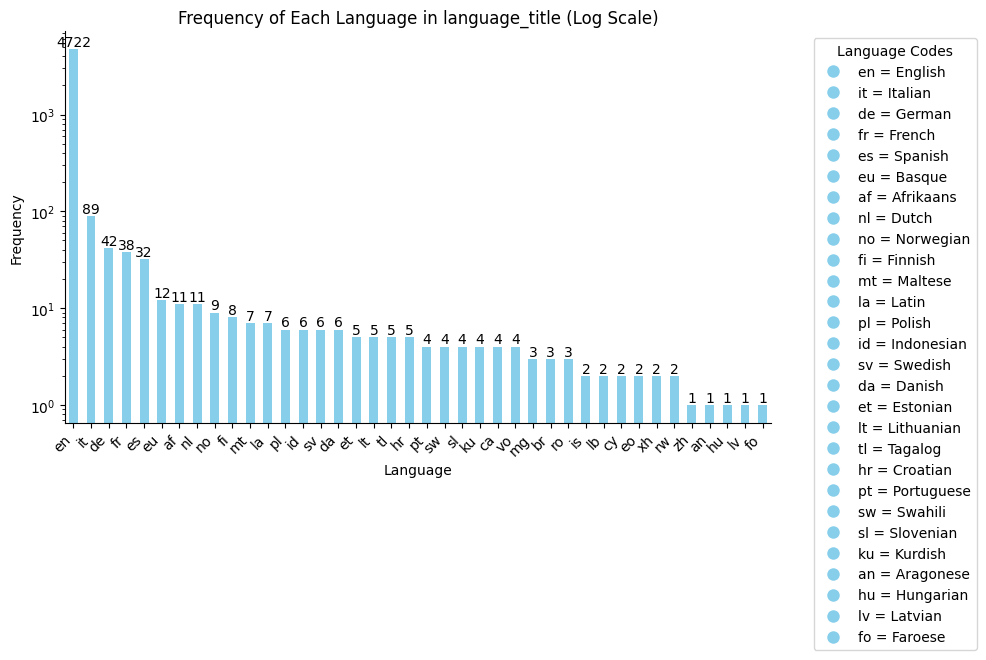

In [64]:
# Assuming df_food_trial is already loaded and has the 'language_title' column
# Language code to full name mapping
language_names = {
    'en': 'English', 'it': 'Italian', 'de': 'German', 'fr': 'French', 'es': 'Spanish', 'eu': 'Basque',
    'af': 'Afrikaans', 'nl': 'Dutch', 'no': 'Norwegian', 'fi': 'Finnish', 'mt': 'Maltese', 'la': 'Latin',
    'pl': 'Polish', 'id': 'Indonesian', 'sv': 'Swedish', 'da': 'Danish', 'et': 'Estonian', 'lt': 'Lithuanian',
    'tl': 'Tagalog', 'hr': 'Croatian', 'pt': 'Portuguese', 'sw': 'Swahili', 'sl': 'Slovenian', 'ku': 'Kurdish',
    'an': 'Aragonese', 'hu': 'Hungarian', 'lv': 'Latvian', 'fo': 'Faroese'
}

# Get the language counts from df_food_trial using value_counts()
language_counts = df_food_trial['language_title'].value_counts()

# Plotting the frequency of each language with log scale
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size for more space
bars = language_counts.plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Frequency of Each Language in language_title (Log Scale)')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.set_yscale('log')  # Apply log scale to y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display frequency values above each bar
for bar in bars.patches:
    height = bar.get_height()  # Get the height of each bar
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

# Create a custom legend with language names (only for languages in the dataset)
handles = []
for code, full_name in language_names.items():
    if code in language_counts.index:
        # Add custom handles to the legend if the language code exists in the dataset
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{code} = {full_name}', 
                                   markerfacecolor='skyblue', markersize=10))

# Add the legend to the plot
ax.legend(handles=handles, title="Language Codes", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.spines['top'].set_visible(False)  # For better appearance
ax.spines['right'].set_visible(False)  # For better appearance
plt.tight_layout()  # Adjust layout to ensure no clipping

# Display the plot
plt.show()


- Observations:
    - `English` ('en') emerges as the `dominant language` in the dataset, `followed by Italian` ('it') `and then German` ('de'). Notably, the frequency of incidents reported in German ('de') is approximately half of those reported in Italian ('it').
    - A legend has been incorporated into the plot to clarify the meaning of the two-letter language codes, ensuring easier interpretation of the chart.
    - Due to the significant imbalance in the dataset—where English predominates—log-scale was applied to the y-axis of the bar chart. This adjustment allows for better visibility of low-frequency languages, such as Faroese ('fo').
Insights:

- `Most Food Incidents`:
    - `Countries or regions where English is the dominant language` (e.g., the United States or the United Kingdom) report the highest number of food incidents. This likely reflects a combination of factors, such as a larger dataset, higher levels of reporting, or robust tracking systems. 
        - From the previous plots, we verifies that United States indeed has the most fod incidents.
- Fewest Food Incidents:
    - Languages such as Aragonese ('an'), Hungarian ('hu'), Latvian ('lv'), and Faroese ('fo') have the lowest number of reported food incidents. This could be attributed to smaller population sizes, less frequent reporting, or limited data collection in regions where these languages are spoken.
This analysis provides a clear understanding of the language-based distribution of food incident reports and sets the stage for further exploration of trends in incident frequency over time.
- Furthermore, we will check the food  combining detected `Lnguage` and `Year`.  

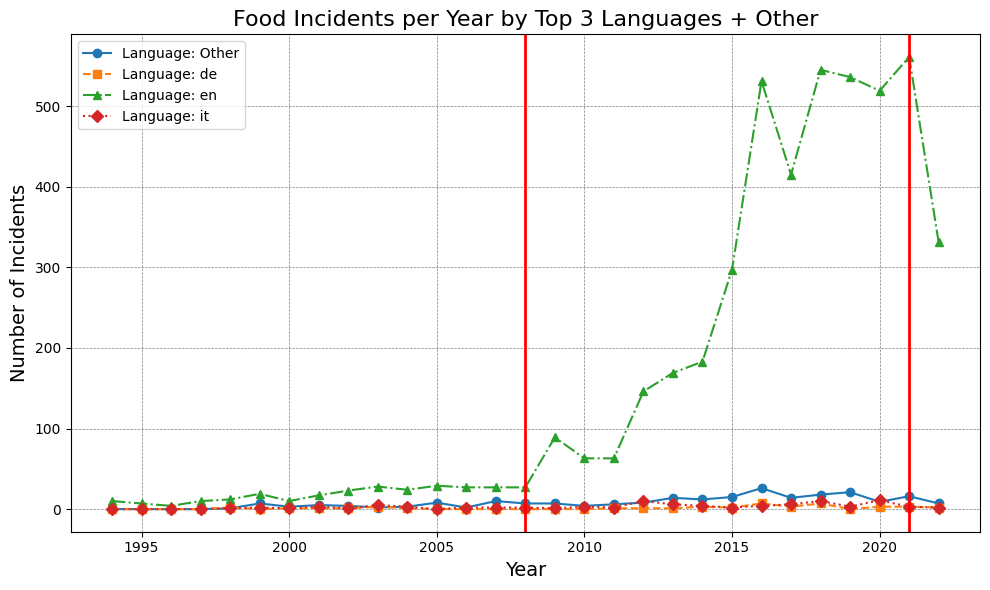

In [65]:
# Group by year and language, count occurrences, and sort by total occurrences across all years
language_counts = df_food_trial[['year','title','language_title']].groupby('language_title').size().sort_values(ascending=False)

# Get the top 3 most frequent languages
top_languages = language_counts.head(3).index

# Replace other languages with 'Other'
df_food_trial['language_title'] = df_food_trial['language_title'].apply(lambda x: x if x in top_languages else 'Other')

# Recalculate the number of incidents per year for each language (including 'Other')
incident_count_per_year_language = df_food_trial.groupby(['year', 'language_title']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(10, 6))

# Define distinct line styles and markers for each language
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'x']

# Plot only the top 3 languages and 'Other'
for i, language in enumerate(incident_count_per_year_language.columns):
    plt.plot(incident_count_per_year_language.index, incident_count_per_year_language[language], 
             label=f"Language: {language}", marker=markers[i], linestyle=line_styles[i])

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Food Incidents per Year by Top 3 Languages + Other', fontsize=16)
plt.legend(loc='upper left', fontsize=10)

# Add a grid with a lighter color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add a red vertical line at year 2020
plt.axvline(x=2008, color='red', linestyle='-', linewidth=2, label='2020 Trend Change')
plt.axvline(x=2021, color='red', linestyle='-', linewidth=2, label='2021 Trend Change')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

- We observe a notable `increase in food incidents` `from 2008 to 2021`. However, following 2021, there is a clear decline in the number of incidents.
    - The vertical red lines represent the time period during which food incidents exhibited a significant increase, highlighting the duration of this upward trend.
- Other category represnts all other languages except english and italian.
--------------------------------------
- Having an overall view for the diffrent languages in our columns "title" and "text", we thought that it would be a good approach to `translate non english text data  in the English language` for the following reasons: 
1. `Consistency in Feature Space`
    - (Because in teh next steps we will use TF-IDF for vectorisinf the text data) TF-IDF generates a vector representation of the text where each term corresponds to a dimension. If your dataset contains text in multiple languages, the feature space will include terms from all languages. This can lead to an overly sparse and large feature space, making the classifier less efficient and harder to train.
2.  `Cross-Language Semantics`
    - Words with similar meanings in different languages will be treated as unrelated by TF-IDF since they appear as different tokens. Translating all text into a single language ensures that semantically similar terms contribute consistently to the feature vectors.
3. `Ease of Model Training`
    - Classifiers often perform better when trained on consistent data. Mixing languages can lead to misinterpretations of the importance of certain terms and potentially decrease the model’s performance.
- For this puprpose, we creted a seperate Jupyter notebook `translate.ipynb`
    - **Hoewever**, we oberved in practice that this approach has a quite low impact, so we decided to remove it. 
    - If you want to see the implementation and the results please read the aforementioned Jupyter Notebook.

- Let's call the function `preprocess_dataframe_column` for the preprocess.

- We can observe that columns `title` and `text` altered based on basic nlp preprocess e.g. low letters.
- For simplisity we will save in our df only the needed columns. 

### Investigate Imbalance 

- Exploration of Imbalance and Data Augmentation has been implemented on jupyter `class-imbalance`.

## References

[1]. Randl, K., Pavlopoulos, J., Henriksson, A., & Lindgren, T. (2024). CICLe: Conformal In-Context Learning for Large-scale Multi-Class Food Risk Classification. *Findings of the Association for Computational Linguistics (ACL)*, 459-471. [Link to Paper](https://aclanthology.org/2024.findings-acl.459.pdf)
